In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import seaborn as sns
from itertools import cycle
import matplotlib.style as style
from collections import Counter
style.use('seaborn')

colors = cycle(["C{}".format(i) for i in range(10)])

In [3]:
import functions as f

stations = pd.read_csv("stations.csv")
lats = list(stations.get('latitude'))
longs = list(stations.get('longitude'))

names = []
towns = []
points = []
mapping = {}
for index, row in stations.iterrows():
    names.append( row['name'] )
    towns.append( row["town"] )
    mapping[row['name']] = row["town"]
    lat = lats[index]
    long = longs[index]
    points.append( ( lat, long) )

In [4]:
import functions as f
from datetime import datetime

users = pd.read_csv("users.csv")

trips = users['trips'].to_list()
completeList = []
for user in trips:
    totalTrips = []
    numtrips = 0
    strings = user.split("},")
    splitstrings = []
    for string in strings:
        splitstrings.append(string.split(","))
    splitstrings[-1][-1] = splitstrings[-1][-1][:-2]

    for splitstring in splitstrings:
        unlock = datetime.strptime(splitstring[0][13:-1], "%m-%d-%y %H:%M:%S")
        
        distance = float(splitstring[2][8:])
        duration = float(splitstring[3][12:])
        start = splitstring[5][18:-1].replace('/','-')
        end = splitstring[6][16:-1].replace('/','-')

        if start not in mapping.keys() or end not in mapping.keys():
            numtrips += 1
            continue
        elif mapping[start] != mapping[end]:
            numtrips += 1
            continue
        else:
            totalTrips.append({'unlock': unlock, 'distance': distance, 'duration': duration, 'town': mapping[start], 'numtrips': numtrips})
            numtrips += 1
    
    completeList.append(totalTrips)

users['trips'] = completeList
# trips["start_time"] = pd.to_datetimetrips["start_time"])
# trips["duration"] = pd.to_timedeltatrips["duration"])
# deltaF = datetime.timedeltaminutes=1) # filter out trips which take less than 1 min
# deltaC = datetime.timedeltahours=24) # filter out trips which take longer than a day
# trips = trips.loc[trips['duration'] > deltaF]
# trips = trips.loc[trips['duration'] < deltaC]
# filter out trips earlier than april 1st and later than october 31st
# trips = trips.loc[trips['start_time']]

# displayusers)

In [5]:
def flatten_list(nested_list):
    """
    Flatten a list of lists into a single list.
    """
    # Use a nested list comprehension to flatten the list
    return [item for sublist in nested_list for item in sublist]

completeList = flatten_list(completeList)

In [6]:
print(completeList[9])

{'unlock': datetime.datetime(2018, 8, 3, 23, 9, 15), 'distance': 4.965, 'duration': 40.7926, 'town': 'Holyoke', 'numtrips': 9}


In [7]:
filteredList = [x for x in completeList if x['unlock'].month == 3 and x['unlock'].year == 2022]

In [8]:
print(filteredList[90])

{'unlock': datetime.datetime(2022, 3, 18, 8, 9, 22), 'distance': 1.274, 'duration': 6.470366666666666, 'town': 'Northampton', 'numtrips': 364}


In [9]:
# yr = 2022
# mon = 3
# filteredList = [x for x in completeList if x['unlock'].month == mon and x['unlock'].year == yr]

def computeCount(list):
    numtripList = [x['numtrips'] for x in list]
    numtripSet = set(numtripList)
    resultsList = [0,0,0,0,0]
    for num in numtripSet:
        count = len([x for x in list if x['numtrips'] == num])
        if num < 5:
            resultsList[0] += count
            continue
        if num < 15:
            resultsList[1] += count
            continue
        if num < 30:
            resultsList[2] += count
            continue
        if num < 50:
            resultsList[3] += count 
            continue
        if num >= 50:
            resultsList[4] += count
            continue
    return resultsList

In [10]:
years = list(range(2018, 2023))

labels = ['7-18', '8-18', '9-18', '10-18', '4-19', '5-19', '6-19', '7-19', '8-19', '9-19', '10-19', '4-20', '5-20', '6-20', '7-20', '8-20', '9-20', '10-20', '4-21', '5-21', '6-21', '7-21', '8-21', '9-21', '10-21', '4-22', '5-22', '6-22', '7-22', '8-22', '9-22', '10-22']

resultsarray = [[],[],[],[],[]]
for yr in years:
    months = range(4, 11)
    if yr == 2018:
        months = range(7,11)
    for mon in months:
        filteredList = [x for x in completeList if x['unlock'].month == mon and x['unlock'].year == yr]
        result = computeCount(filteredList)
        for i, num in enumerate(result):
            resultsarray[i].append(num)


In [29]:
eighteen = pd.date_range('2018-07-01', periods=123, freq='1440min')
nineteen = pd.date_range('2019-04-01', periods=214, freq='1440min')
twenty = pd.date_range('2020-04-01', periods=214, freq='1440min')
twone = pd.date_range('2021-04-01', periods=214, freq='1440min')
twtwo = pd.date_range('2022-04-01', periods=214, freq='1440min')
combined = eighteen.union(nineteen).union(twenty).union(twone).union(twtwo)
print(combined)

resultsarray = [[],[],[],[],[]]
for date in combined:
    filteredList = [x for x in completeList if x['unlock'].month == date.month and x['unlock'].year == date.year and x['unlock'].day == date.day]
    result = computeCount(filteredList)
    for i, num in enumerate(result):
        resultsarray[i].append(num)


DatetimeIndex(['2018-07-01', '2018-07-02', '2018-07-03', '2018-07-04',
               '2018-07-05', '2018-07-06', '2018-07-07', '2018-07-08',
               '2018-07-09', '2018-07-10',
               ...
               '2022-10-22', '2022-10-23', '2022-10-24', '2022-10-25',
               '2022-10-26', '2022-10-27', '2022-10-28', '2022-10-29',
               '2022-10-30', '2022-10-31'],
              dtype='datetime64[ns]', length=979, freq=None)


In [96]:

resultsDict = {'date': combined}
for i, array in enumerate(resultsarray):
    resultsDict[str(i)] = array

new = pd.DataFrame.from_dict(resultsDict)

new['0mavg'] = new['0'].rolling(window=14).mean()
new['1mavg'] = new['1'].rolling(window=14).mean()
new['2mavg'] = new['2'].rolling(window=14).mean()
new['3mavg'] = new['3'].rolling(window=14).mean()
new['4mavg'] = new['4'].rolling(window=14).mean()


print(new)

,date,0,1,2,3,4,0mavg,1mavg,2mavg,3mavg,4mavg
0,2018-07-01,33,32,28,5,0,NaN,NaN,NaN,NaN,NaN
1,2018-07-02,25,13,7,2,0,NaN,NaN,NaN,NaN,NaN
2,2018-07-03,22,22,8,0,0,NaN,NaN,NaN,NaN,NaN
3,2018-07-04,43,6,8,1,0,NaN,NaN,NaN,NaN,NaN
4,2018-07-05,37,11,7,8,0,NaN,NaN,NaN,NaN,NaN
5,2018-07-06,39,10,0,3,0,NaN,NaN,NaN,NaN,NaN
6,2018-07-07,80,24,8,3,0,NaN,NaN,NaN,NaN,NaN
7,2018-07-08,86,11,5,0,0,NaN,NaN,NaN,NaN,NaN
8,2018-07-09,47,14,3,7,1,NaN,NaN,NaN,NaN,NaN
9,2018-07-10,51,32,8,11,0,NaN,NaN,NaN,NaN,NaN


<ipython-input-113-17b3085dda8b>:34: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


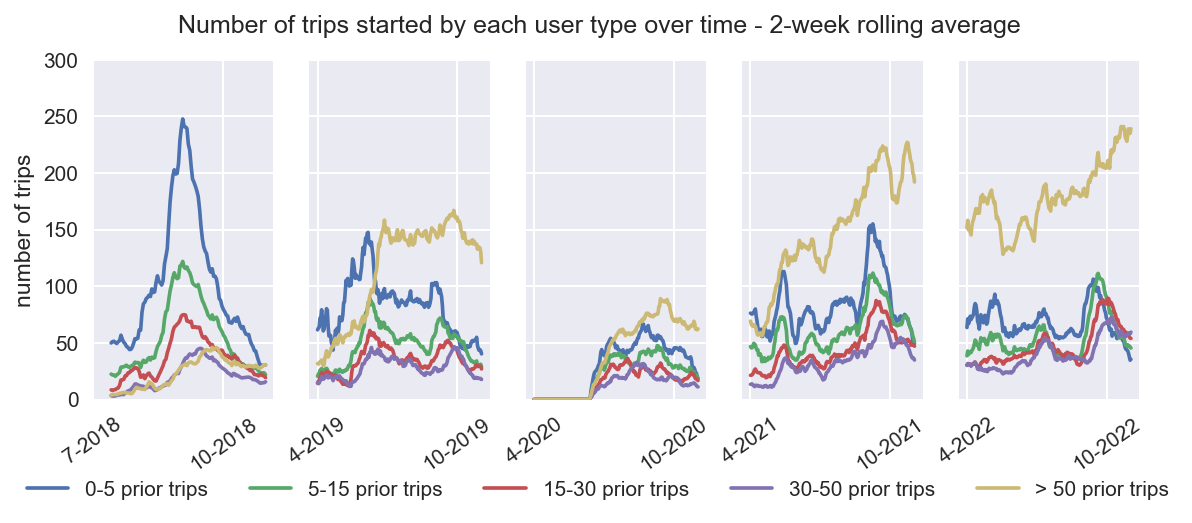

In [113]:
import matplotlib.dates as mdates

def plot_repeat_user_trips_datetime(df, townname="started in all towns"):
    # plt.figure()
    # df.set_index('date', inplace=True)
    # df.index = df.index.map(str)
    fig, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(figsize=(9,3), dpi=150, ncols=5)
    length = len(labels)
    legend = ["0-5 prior trips", "5-15 prior trips", "15-30 prior trips", "30-50 prior trips", "> 50 prior trips"]
    
    labelList = [('7-2018', '10-2018'), ('4-2019', '10-2019'), ('4-2020', '10-2020'), ('4-2021', '10-2021'), ('4-2022', '10-2022')]

    tupleList = [(0, 124), (136, 338), (350, 552), (564, 766), (778, 980)]
    for ax, (low, high), (labelLow, labelHigh) in zip((ax1, ax2, ax3, ax4, ax5), tupleList, labelList):
        ax.plot(list(range(len(df)))[low:high], df['0mavg'][low:high], color="C0")
        ax.plot(list(range(len(df)))[low:high], df['1mavg'][low:high], color="C1")
        ax.plot(list(range(len(df)))[low:high], df['2mavg'][low:high], color="C2")
        ax.plot(list(range(len(df)))[low:high], df['3mavg'][low:high], color="C3")
        ax.plot(list(range(len(df)))[low:high], df['4mavg'][low:high], color="C4")
        ax.set_ylim(0, 300)
        ax.set_xticks([low,high-31])
        ax.set_xticklabels([labelLow,labelHigh], rotation=35)
        if low > 0:
            ax.set_yticklabels([])

    fig.suptitle("Number of trips started by each user type over time - 2-week rolling average")
    ax1.set_ylabel('number of trips'.format(townname))
    # ax.set_xlabel("Date")
    # ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
    # plt.legend(legend, ncols=5)
    plt.legend(legend, loc='lower center', bbox_to_anchor=(-2, -0.35),
          fancybox=True, shadow=True, ncol=5)
    # plt.xticks(ticks=combined, rotation=90)
    plt.tight_layout()
    plt.show()
        # path = "./plots/num_trips.png"
    # if townname != "started in all towns":
    #     path = "./plots/by_city/{}_trips.png".format(townname)
    # plt.savefig(path, facecolor='w')
    # plt.clf()

plot_repeat_user_trips_datetime(new)

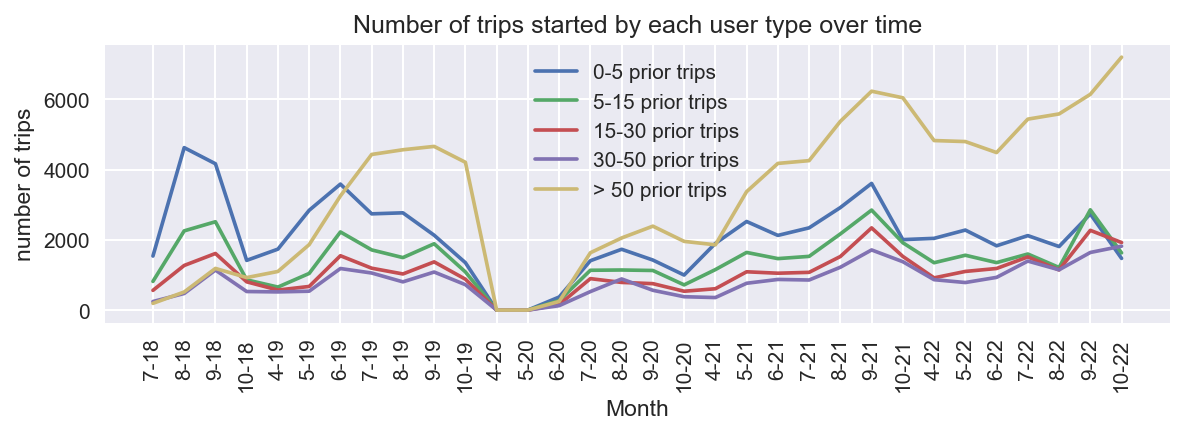

In [41]:
def plot_daily_num_trips(resultsarray, townname="started in all towns"):
    plt.figure(figsize=(8,3), dpi=150)
    length = len(labels)
    legend = ["0-5 prior trips", "5-15 prior trips", "15-30 prior trips", "30-50 prior trips", "> 50 prior trips"]
    for result in resultsarray:
        plt.plot(range(length), result)
    plt.title("Number of trips started by each user type over time".format(townname))
    plt.ylabel('number of trips'.format(townname))
    plt.xlabel("Month")
    plt.legend(legend)
    plt.xticks(ticks=range(length), labels=labels, rotation=90)
    plt.tight_layout()
    plt.show()
    # path = "./plots/num_trips.png"
    # if townname != "started in all towns":
    #     path = "./plots/by_city/{}_trips.png".format(townname)
    # plt.savefig(path, facecolor='w')
    # plt.clf()

plot_repeat_user_trips(resultsarray)

In [117]:
# nummiles = {
#     # 'Chicopee': 0.21,
#     # 'South Hadley': 0.8,
#     'Holyoke': 1,
#     # 'West Springfield': 1.5,
#     # 'Easthampton': 5,
#     # 'Springfield': 5.4,
#     'Amherst': 6,
#     'Northampton': 9
# }
# num miles of bike path * number of stations / population
facilitating = {
    'Chicopee': 0.21*3 / 55560,
    'South Hadley': 0.8*3 / 18150,
    'Holyoke': 1*12 / 38238,
    'West Springfield': 1.5*2 / 28835,
    'Easthampton': 5*5 / 16211,
    'Springfield': 5.4*14 / 155929,
    'Amherst': 6*12 / 39263,
    'Northampton': 9*19 / 29571
}

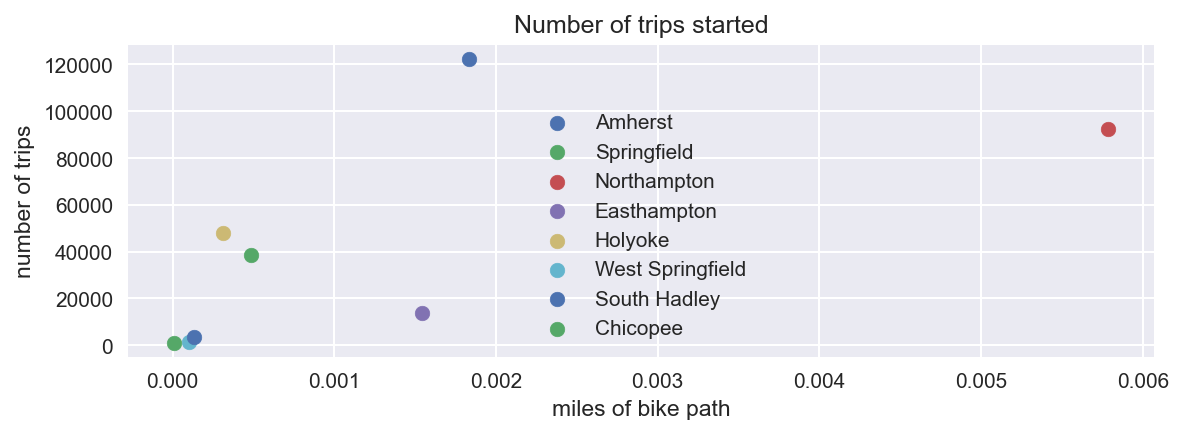

In [116]:
def plot_town_railtrail_trips(list):
    x = []
    y = []
    towns = set(facilitating.keys())
    for town in towns:
        townlist = [x for x in list if x['town'] == town]
        x.append(facilitating[town])
        y.append(len(townlist))
    
    plt.figure(figsize=(8,3), dpi=150)
    for i, town in enumerate(towns):
        plt.scatter(x[i], y[i], label=town)
    plt.title("Number of trips started")
    plt.ylabel('number of trips')
    plt.xlabel("facilitating factors ( [miles of bike path * num. stations] / population)")
    plt.legend()
    plt.tight_layout()
    plt.show()     

plot_town_railtrail_trips(completeList)